In [1]:
# Use the edgelist CSV formatted file to build graphs for visualization (Networkx, matplotlib) 
import os
import pandas as pd
import numpy as np
import csv
import seaborn as sns

import networkx as nx

# matplotlib graphs will be included in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."

# Getting output filename generated by xml_sax_parser 
author_edgelist_file = "./datasets/dblp_author_institute.csv" # dblp_author_institute.csv

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images")    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".jpg")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='jpg', dpi=300)

In [2]:
# This file contains all edges to be constructed
# Duplicate edges will be represented as only 1 edge forming the group of unique venues (equals to the degree of author)
df = pd.read_csv(author_edgelist_file) 
print("Shape of data frame :", df.shape)
df

Shape of data frame : (102642, 2)


,Author,Institution
0,Vilho Risnen,Nokia Research Finland
1,Peng Cui 0002,崔芃
2,Peng Cui 0002,Northwestern Polytechnical University School o...
3,Wilhelm Schfer,University of Paderborn Heinz Nixdorf Institut...
4,Christopher P. Lee 0001,Georgia Institute of Technology Atlanta GA USA
5,Alexander A. MorganAlex Morgan 0001,Stanford University CA USA
6,Lu Liu 0016,Center for Assessment and Development Research...
7,Dace ApshvalkaDace Apsvalka,University of Cambridge UK
8,Eunkyung Kim 0003,University of Wisconsin-Madison USA
9,Yinghui Zhang 0003,Inner Mongolia University Hohhot China


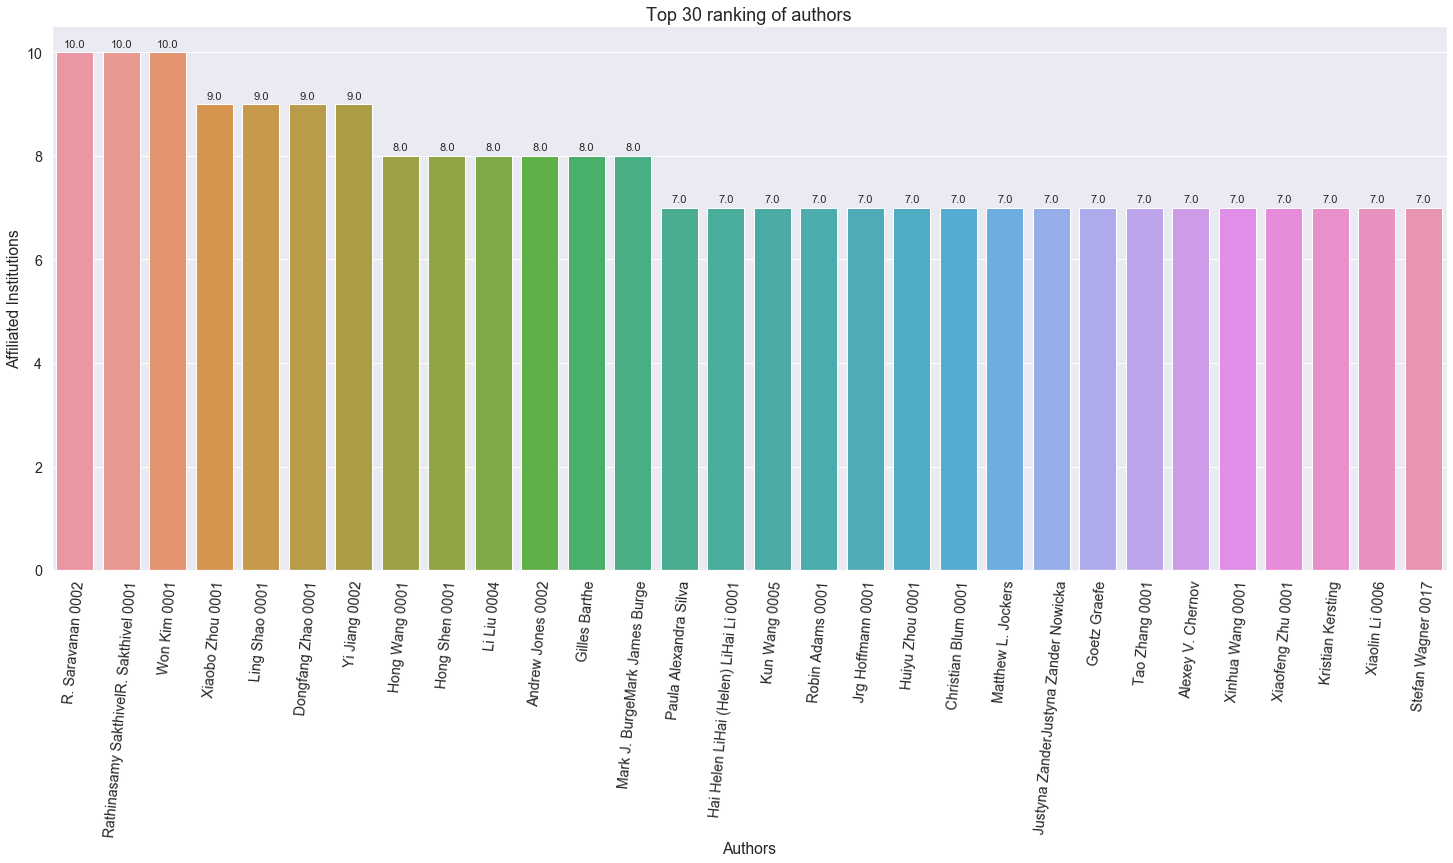

Total no. of authors : 80145
Missing Data for authors : 0.00%
Top 30 :
 Author
R. Saravanan 0002                                              R. Saravanan 0002
Won Kim 0001                                                        Won Kim 0001
Rathinasamy SakthivelR. Sakthivel 0001    Rathinasamy SakthivelR. Sakthivel 0001
Xiaobo Zhou 0001                                                Xiaobo Zhou 0001
Ling Shao 0001                                                    Ling Shao 0001
Dongfang Zhao 0001                                            Dongfang Zhao 0001
Yi Jiang 0002                                                      Yi Jiang 0002
Mark J. BurgeMark James Burge                      Mark J. BurgeMark James Burge
Gilles Barthe                                                      Gilles Barthe
Andrew Jones 0002                                              Andrew Jones 0002
Li Liu 0004                                                          Li Liu 0004
Hong Wang 0001                

In [3]:
# Plotting top rank authors
author_Grp = pd.DataFrame()

# Same as df.groupby('Author')['Institution'].unique()
author_Grp['authorCount'] = df.groupby(['Author'])['Author'].count()
author_Grp['author'] = author_Grp.index
topmost = 30
total_counts = len(df)
bar_text_filler = 0.1

# There are too many authors, so we will subset the top authors
author_Grp_top = author_Grp.sort_values(by='authorCount',ascending=False).head(topmost)
order_authors = author_Grp_top.sort_values(by='authorCount',ascending=False)['author']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='author', y='authorCount', data=author_Grp_top, order=order_authors)
ax.set_title('Top ' + str(topmost) + ' ranking of authors', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=85)
plt.xlabel('Authors')
plt.ylabel('Affiliated Institutions')
plt.show()

print("Total no. of authors :", len(author_Grp.index))
print("Missing Data for authors : " +
      '{:1.2f}%'.format(df['Author'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", author_Grp_top['author'])
print("Total number of conference submissions for all authors (include duplicate venues for co-authors) : ", total_counts)

for ctr in range(len(author_Grp_top)):
    if (author_Grp_top.iloc[ctr]['author'] == -999):
        print("Found in Index", str(ctr) + ":", author_Grp_top.iloc[ctr]['authorCount'])
        print("Missing Data : " + '{:1.2f}%'.format(author_Grp_top.iloc[ctr]['authorCount'] / total_counts * 100))


In [4]:
# Get author list for each unique venue
Institution_Author = pd.DataFrame()
Institution_Author['author'] = df.groupby('Institution')['Author'].unique()

#print("CIKM authors are ", Venue_Authors['author_list']['CIKM'])
print("No. of institutions with unique author : ", Institution_Author.shape[0])

# NUS is at range [21530:21610]
Institution_Author.sort_values(by=['Institution'], ascending=True)['author'].head(10)

No. of institutions with unique author :  46245


Institution
 Beijing Jiaotong University School of Traffic and Transportation Beijing China                                                         [Jun Liu 0061]
 Beijing University of Posts and Telecommunications School of Electronic Engineering Beijing China                                      [Yun Liu 0010]
 Carnegie Mellon University Silicon Valley Moffett Field CA USA                                                                       [Jia Zhang 0001]
 Chinese Academy of Sciences National Space Science Center Beijing China                                                              [Cheng Liu 0007]
 Chinese University of Hong Kong Department of Mathematics Hong Kong                                                                    [Yong Yu 0012]
 Federal Technological University of Paran (UTFPR) Department of Computer Brazil                            [Giovani Volnei MeinerzGiovani V. Meinerz]
 George Mason University Fairfax Virginia USA                                     

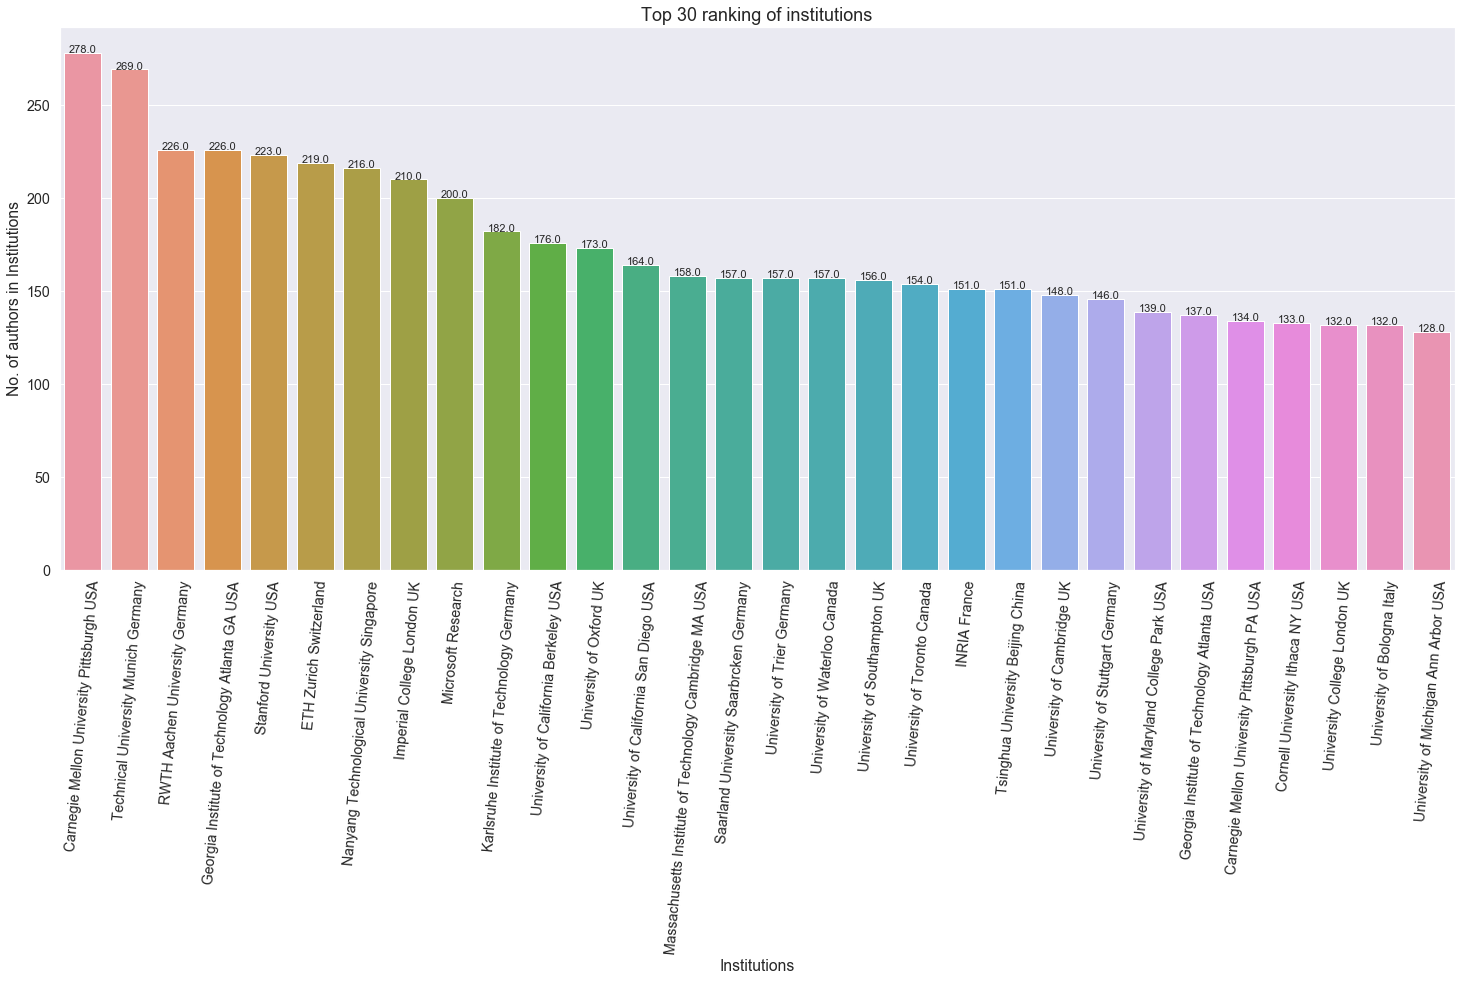

Total no. of Institutions : 46245
Missing Data for Institutions : 0.00%
Top 30 :
 Institution
Carnegie Mellon University Pittsburgh USA                         Carnegie Mellon University Pittsburgh USA
Technical University Munich Germany                                     Technical University Munich Germany
RWTH Aachen University Germany                                               RWTH Aachen University Germany
Georgia Institute of Technology Atlanta GA USA               Georgia Institute of Technology Atlanta GA USA
Stanford University USA                                                             Stanford University USA
ETH Zurich Switzerland                                                               ETH Zurich Switzerland
Nanyang Technological University Singapore                       Nanyang Technological University Singapore
Imperial College London UK                                                       Imperial College London UK
Microsoft Research                        

In [5]:
# Plotting top rank institutions (whereby same author currently working or had worked in the Institution)
institution_Grp = pd.DataFrame()
institution_Grp['InstitutionCount'] = df.groupby(['Institution'])['Institution'].count()
institution_Grp['Institution'] = institution_Grp.index

# Check if ranking is less than topmost
no_Filtered_Institutions = Institution_Author.shape[0]
if no_Filtered_Institutions < topmost:
    topmost = no_Filtered_Institutions

# There are too many authors, so we will subset the top authors
institution_Grp_top = institution_Grp.sort_values(by='InstitutionCount',ascending=False).head(topmost)
order_institutions = institution_Grp_top.sort_values(by='InstitutionCount',ascending=False)['Institution']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='Institution', y='InstitutionCount', data=institution_Grp_top, order=order_institutions)
ax.set_title('Top ' + str(topmost) + ' ranking of institutions', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=85)
plt.xlabel('Institutions')
plt.ylabel('No. of authors in Institutions')
plt.show()

print("Total no. of Institutions :", len(institution_Grp.index))
print("Missing Data for Institutions : " +
      '{:1.2f}%'.format(df['Institution'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", institution_Grp_top['Institution'])

for ctr in range(len(institution_Grp_top)):
    if (institution_Grp_top.iloc[ctr]['Institution'] == -999):
        print("Found in Index", str(ctr) + ":", institution_Grp_top.iloc[ctr]['InstitutionCount'])
        print("Missing Data : " + '{:1.2f}%'.format(institution_Grp_top.iloc[ctr]['InstitutionCount'] / total_counts * 100))


## End of Program